# Clase 7: ecosistema científico
Docente: Emiliano López - ``emiliano.lopez@gmail.com`` 

- Fecha: 13-10-2022
- Unidad 2: ecosistema científico básico
- Temas:
    - Numpy.

## Ecosistema científico

- **Numpy:** crear y manipular datos numéricos: https://numpy.org/
- **SciPy:** conjunto de herramientas comunmente utilizadas, procesamiento imágenes, estadísticas, etc.: https://scipy.org/
- **Pandas:** python data analysis library https://pandas.pydata.org/
- **Matplotlib:** visualización de datos: https://matplotlib.org/
- **Plotly:** Plotly Python Open Source Graphing Library https://plotly.com/python/

## Limitaciones de las listas

- ¿Si sumamos dos listas qué pasa?

In [24]:
x1 = [1, 2, 3, 4]
x2 = [2, 3, 4, 5]
x3 = x1 + x2

In [25]:
x3

[1, 2, 3, 4, 2, 3, 4, 5]

In [26]:
# para sumarlas deberíamos hacer algo así:

suma = []
for a,b in zip(x1, x2):
    suma.append(a+b)
suma

[3, 5, 7, 9]

- **¿Si multiplicamos una lista por un entero?**

In [27]:
x4 = 2*x3

In [28]:
x4

[1, 2, 3, 4, 2, 3, 4, 5, 1, 2, 3, 4, 2, 3, 4, 5]

In [29]:
s = "esto se repite "
s*2

'esto se repite esto se repite '

- **¿Cómo calcularíamos $y = x^2$ para x entre -10 y 10?**

In [31]:
x = list(range(-10,11))
y = []
for cualquiera in x:
    y.append(cualquiera**2)

In [32]:
y

[100, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

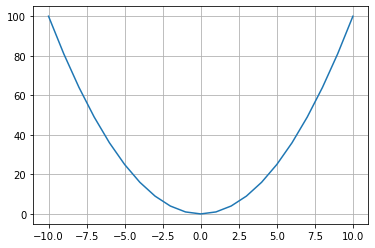

In [33]:
import matplotlib.pyplot as plt

plt.grid()
plt.plot(x, y);

- ¿Si queremos graficar $y = -x^2$?

In [34]:
plt.plot(x, -y)

TypeError: bad operand type for unary -: 'list'

## Numpy

- https://numpy.org/devdocs/user/quickstart.html
- https://scipy-lectures.org/

### Crear arreglos con numpy

In [16]:
import numpy as np

**Creemos algunos arreglos/vectores numpy:**

In [35]:
data = np.array(y)


In [36]:
type(data)

numpy.ndarray

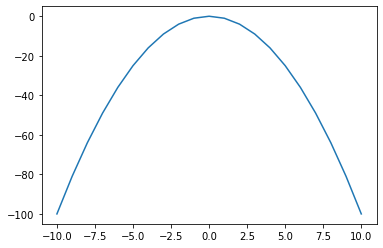

In [38]:
plt.plot(x, -data)

In [39]:
data0 = np.zeros(4)
data0

array([0., 0., 0., 0.])

In [40]:
data1 = np.ones(4)
data1

array([1., 1., 1., 1.])

In [43]:
data_rnd = np.random.random(4)
data_rnd

array([0.12774287, 0.54781916, 0.98387909, 0.86440856])

In [44]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



**¿Qué tipo es?**

In [45]:
type(data0)

numpy.ndarray

In [46]:
# ¿cómo opera la suma?
suma1 = data_rnd + data1
suma1

array([1.12774287, 1.54781916, 1.98387909, 1.86440856])

### **Vectores equispaciados:** ``linspace``

In [48]:
x = np.linspace(0,1,10)
len(x)

10

### **Vectores con paso específico:** ``arange``

In [54]:
u = np.arange(0, 1, 0.1)
u

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

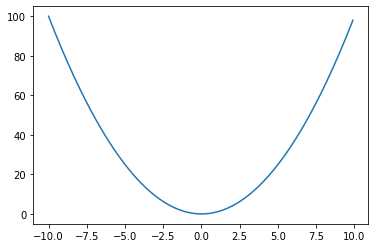

In [62]:
x = np.arange(-10,10,0.1)
y = x**2

plt.plot(x,y,'-')

### Operaciones

In [ ]:
# suma
r1 = data + data1

# multiplicación ? 
r2 = data_rnd * data1

# OJO: divide elemento a elemento
r3 = data_rnd / data_rnd

# multiplicación por un escalar
k = 1.5
r4 = k * data1 

# producto interno: np.dot() o un_vector.dot(otro_vector)
prod_int1 = np.dot(r1,r1)
prod_int2 = r1.dot(r1)

array([100,  81,  64,  49,  36,  25,  16,   9,   4,   1,   0,   1,   4,
         9,  16,  25,  36,  49,  64,  81, 100])

### Indexado
- Igual que en listas

In [67]:
data[0]

100

In [70]:
data[1:10:2] # igual que en las listas: inicio, fin-1, paso

array([81, 49, 25,  9,  1])

In [72]:
data[-2:]

array([ 81, 100])

### Indexado avanzado
Similar a R (matlab creo que no lo tiene) podemos usar otros vectores como índices.

In [74]:
v = np.arange(0, 100, 10) # inicio, fin, paso
v

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [75]:
indices = [1, 5, -1]

v[indices]

array([10, 50, 90])

- Esta característica fantástica está vinculada al **enmascarado lógico (boolean masking)**, veamos lo que obtenemos al comparar un vector numpy con algún valor acorde a su contenido:

In [76]:
v>50

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [77]:
idx = v>50
v[idx]

array([ 0, 10, 20, 30, 40, 50])

Obtuvimos un vector de valores lógicos (True o False) que también puede ser usados como índices, en este caso nos mostrará solo aquellos valores donde el índice sea True.

In [78]:
ind = (v>50) | (v<20)
v[ind]

array([ 0, 10, 60, 70, 80, 90])

Usualmente hacemos toda la operación directamente entre corchetes:

In [ ]:
v[v>50]

Podemos usar los operadores lógicos (and, or, not, ..): ``&, |, ~, ^``

In [82]:
v[(v>50) & (v<=90)]

array([60, 70, 80, 90])

### Ejercitación 7.1

- **a).** Calcular y graficar las siguientes funciones para x entre $[-1, 1]$:
    - $y = x^2$ 
    - $y = 2x^2$ 
    - $y = 3x^2$ 
- **b).** Generar una función $y = x^2$ y otra $\hat y = y + $ruido. El ruido se puede generar usando ``np.random.random(y.size)``. Graficar ambas curvas.
    - Calculemos la raíz del error cuadrático medio (RMSE, del inglés Root Mean Square Error):
    
$$\text{RMSE} = \sqrt{\frac{1}{N}\sum_{i=0}^{N-1}(y_i - \hat{y_i})^2}$$



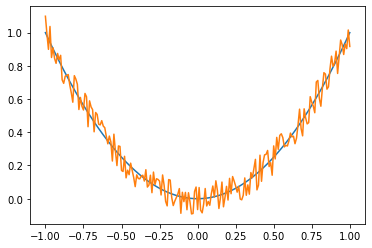

In [90]:
# np.sum()  -> suma todo un ndarray
# np.sqrt() -> calcula la raiz cuadrada
dx = 0.01
x = np.arange(-1 , 1 + dx, dx)
y = x**2

yaprox = y + np.random.random(y.size)/5 - 0.1

plt.plot(x, y, x, yaprox)

In [93]:
suma_error_cuadratico = np.sum((y-yaprox)**2)

In [96]:
mse = suma_error_cuadratico/len(y)

In [97]:
rmse = np.sqrt(mse)
rmse

0.05842255193889657

### Intro a plotly

- nosotros <-> API <-> plotly

- API: 
    - plotly express o 
    - graph objects

In [101]:
otro_x = x

In [99]:
import plotly.graph_objects as go

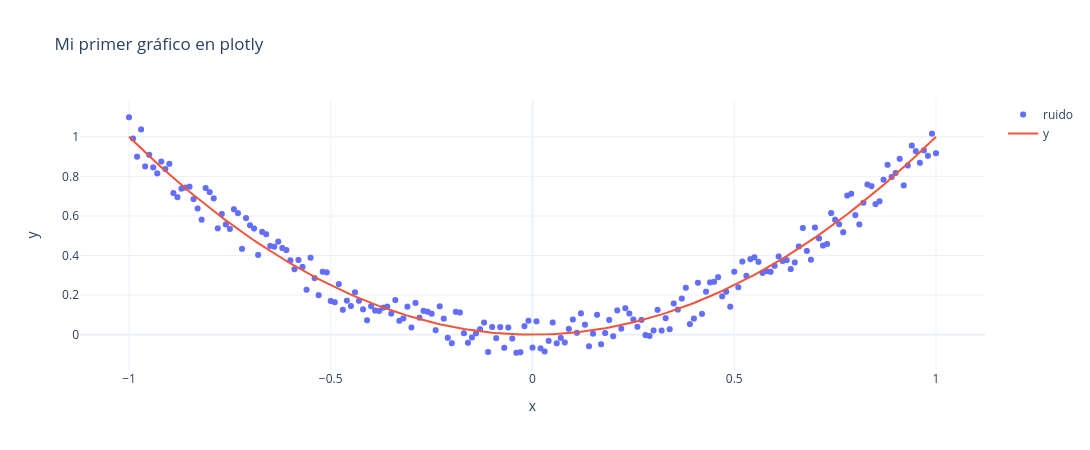

In [122]:
# creamos una figura
fig1 = go.Figure()

# agregar a esa figura una traza, una curva
fig1.add_trace(go.Scatter(x=otro_x, y=yaprox, mode="markers", name="ruido"))
fig1.add_trace(go.Scatter(x=otro_x, y=y, mode="lines", name="y"))
fig1.update_layout(title="Mi primer gráfico en plotly",
                  xaxis_title="x",
                  yaxis_title="y",
                  template="plotly_white")

- **c).** Graficar la siguiente función senoidal para $t$ en $[-1, 1]$ con dt = 0.01, A=1, $\phi=0$, $f=1$


$$f(t) = A * sin(2\pi*f*t +\phi)$$


- **d).** Desafío: ¿graficar sobre la misma figura para f en $[1, 5]$?

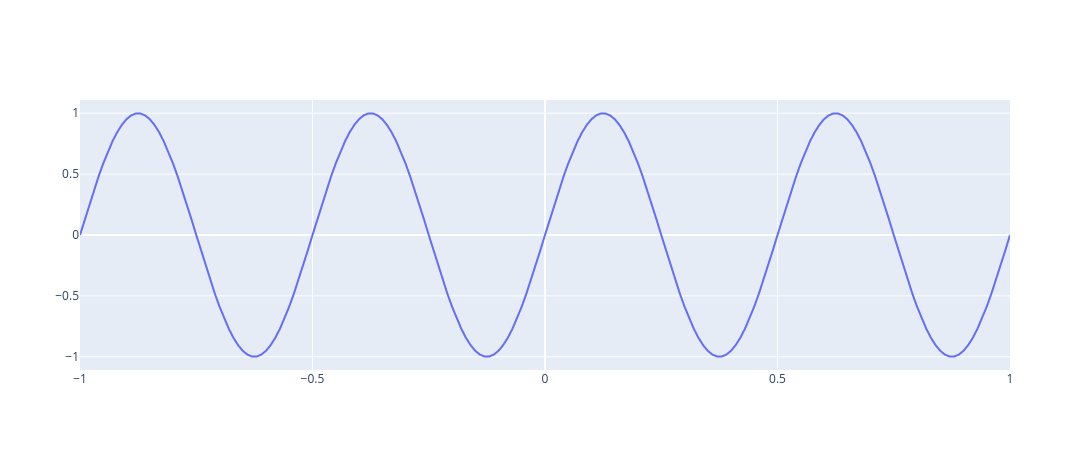

In [130]:
# item c
dt = 0.01
t = np.arange(-1,1+dt,dt)
frec = 2
f = np.sin(2*np.pi * frec * t)
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=t, y=f))

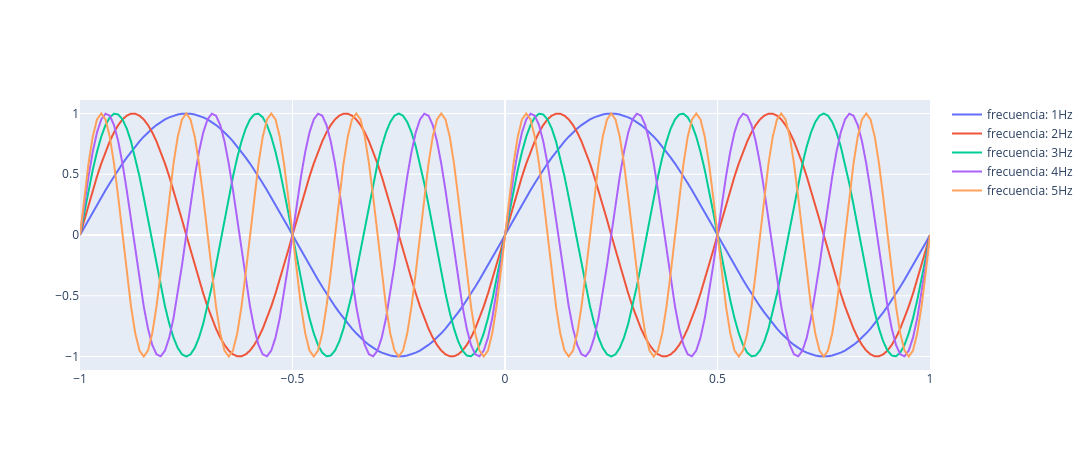

In [134]:
# item c
fig4 = go.Figure()

for frec in range(1,6):
    f = np.sin(2*np.pi * frec * t)
    fig4.add_trace(go.Scatter(x=t, y=f, name=f"frecuencia: {frec}Hz"))
    
fig4.show()

### Matrices

In [135]:
from PIL import Image

In [136]:
import PIL
PIL.__version__

'8.1.0'

### Cargamos una imagen

- Veamos su estructura

In [141]:
i = Image.open('datos/pics/lapacho2.jpg')
im = np.array(i)

print(type(im))
print(im.dtype)
print(im.ndim)
print(im.shape)

<class 'numpy.ndarray'>
uint8
3
(1280, 960, 3)


### Visualizamos la imagen

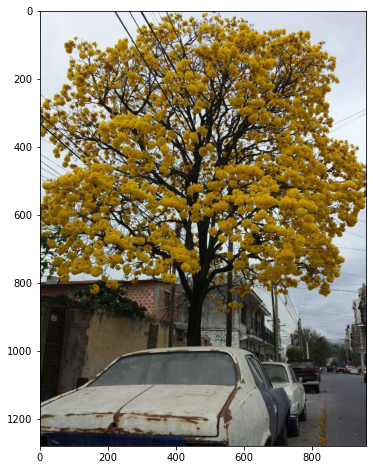

In [142]:
plt.figure(figsize = (8, 8))
plt.imshow(im);

### Visualizamos el valor de los pixeles

Analicemos como se muestra en valor de los pixeles de una submatriz usando slices

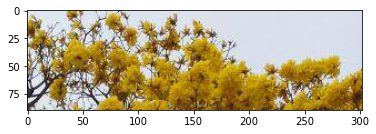

In [143]:
recortada = im[10:100, 440:742,:]
plt.imshow(recortada)

In [145]:
# un pixel
im[4,5,0]

235

In [147]:
im[4,5,1]

239

In [149]:
im[4,5,2]

248

### Veamos los componentes RGB
- Veamos como concatenar tres imágenes seguidas con cada uno de los componentes R, G y B.
- Notar que el método ``.copy()`` genera otra matriz, por lo tanto sin modificar la original

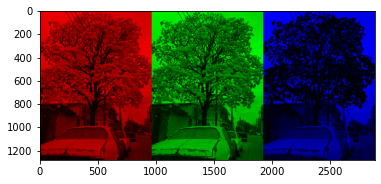

In [151]:
im_R = im.copy()
im_R[:, :, (1, 2)] = 0
im_G = im.copy()
im_G[:, :, (0, 2)] = 0
im_B = im.copy()
im_B[:, :, (0, 1)] = 0

im_RGB = np.concatenate((im_R, im_G, im_B), axis=1)
plt.imshow(im_RGB);

### Ejercitación 7.2

- Recorrer la imagen usando dos ciclos for anidados y cambiar aquellos pixeles donde el promedio entre el componente rojo, verde y azul sea mayor a 200, por el color azul (0, 0, 255)

In [13]:
filas, columnas, n = im.shape

for f in range(filas):
    for c in range(columnas):
        if im[f,c].mean()>200:
            im[f,c,0] = 0
            im[f,c,1] = 0
            im[f,c,2] = 255

In [14]:
plt.figure( figsize = (8, 8))
plt.imshow(im)